### Exercise 11.3
  
Estendo ora il modello sviluppato in precedenza al caso di una funzione 2D: $f(x,y) = \sin(x^2+y^2)$ nell'intervallo $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [1]:
import numpy as np


np.random.seed(0)
n_train = 10000

x_train = np.random.uniform(-1.5, 1.5, n_train) 
x_valid = np.random.uniform(-1.5, 1.5, 1000) 
y_train = np.random.uniform(-1.5, 1.5, n_train) 
y_valid = np.random.uniform(-1.5, 1.5, 1000) 

z_target = np.sin(x_valid**2 + y_valid ** 2)

input_train = np.array([x_train, y_train])
input_train = np.reshape(input_train,(n_train,2))


input_valid = np.array([x_valid, y_valid])
input_valid = np.reshape(input_valid,(1000,2))


sigma = 0.1

z_train = np.zeros(n_train)
z_valid = np.zeros(1000)

for i in range(n_train):
    z_train[i]=np.random.normal(np.sin(input_train[i,0]**2 + input_train[i,1] ** 2), sigma)

for i in range(1000):
    z_valid[i]=np.random.normal(np.sin(input_valid[i,0]**2 + input_valid[i,1] ** 2), sigma)

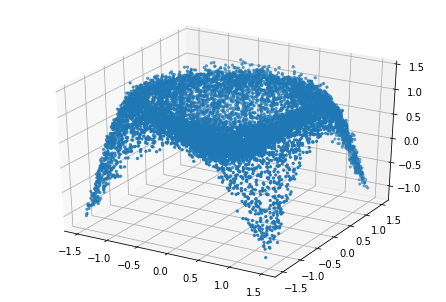

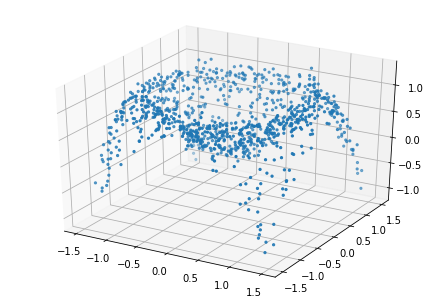

In [2]:
#plot training and validation dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax = Axes3D(fig)


for i in range(n_train):
        x_train[i] = input_train[i,0]
        y_train[i] = input_train[i,1]
#print(x)
ax.scatter(x_train, y_train, z_train, marker='.')

for i in range(1000):
        x_valid[i] = input_valid[i,0]
        y_valid[i] = input_valid[i,1]
#print(x)
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.scatter(x_valid, y_valid, z_valid, marker='.')
#ax.plot_surface(input_valid, z_target)
plt.grid(True) 
plt.show()

In [3]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


model=tf.keras.Sequential()
model.add(Dense(15, input_shape=(2,),activation = 'tanh'))
model.add(Dense(30,activation = 'relu'))
model.add(Dense(10,activation = 'elu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                45        
_________________________________________________________________
dense_1 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(x=input_train, y=z_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(input_valid, z_valid))

Epoch 1/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1728 - mse: 0.1728 - val_loss: 0.1178 - val_mse: 0.1178
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.1113 - mse: 0.1113 - val_loss: 0.0881 - val_mse: 0.0881
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0326 - val_mse: 0.0326
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 6/30
313/313 [==============================] - 1s 4ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 7/30
313/313 [==============================] - 1s 4ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 8/30
313/313 [==============================] - 1s 4ms/step - loss: 0.

In [5]:
# evaluate model
score = model.evaluate(input_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 3ms/step - loss: 0.0122 - mse: 0.0122

Test loss: 0.012226279824972153
Test accuracy: 0.012226279824972153


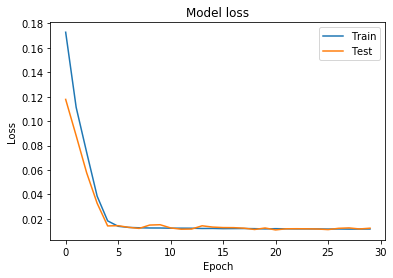

In [6]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

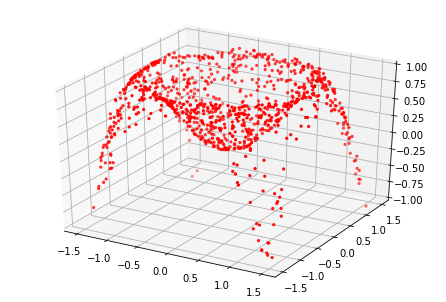

In [7]:
x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
input_predicted = np.array([x_predicted, y_predicted])

input_predicted = np.reshape(input_predicted,[1000,2])
z_predicted = model.predict(input_predicted)

for i in range(1000):
        x_predicted[i] = input_predicted[i,0]
        y_predicted[i] = input_predicted[i,1]
#print(x)

fig=plt.figure()
ax = Axes3D(fig)
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', marker='.')
ax.set_zlim3d(-1.,1.)
plt.grid(True)
plt.show()